<a href="https://colab.research.google.com/github/LordLean/sharing-github/blob/master/Neural_Networks/GAN/NumGAN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

[MNIST](https://machinelearningmastery.com/how-to-develop-a-generative-adversarial-network-for-an-mnist-handwritten-digits-from-scratch-in-keras/)


[Generate CIFAR10 Small Color Photographs](https://machinelearningmastery.com/how-to-develop-a-generative-adversarial-network-for-a-cifar-10-small-object-photographs-from-scratch/)

In [1]:
from matplotlib import pyplot as plt
from keras.datasets.mnist import load_data

from keras.models import Sequential
from keras.optimizers import Adam
from keras.layers import Dense
from keras.layers import Conv2D
from keras.layers import Flatten
from keras.layers import Dropout
from keras.layers import LeakyReLU
from keras.utils.vis_utils import plot_model

from numpy import expand_dims
from numpy import ones
from numpy import zeros
from numpy.random import rand
from numpy.random import randint

11493376/11490434 [==============================] - 0s 0us/step


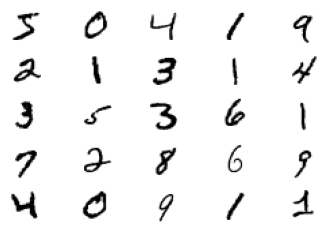

In [2]:
(trainX, trainy), (testX, testy) = load_data()

for i in range(25):
	# define subplot
	plt.subplot(5, 5, 1 + i)
	# turn off axis
	plt.axis('off')
	# plot raw pixel data
	plt.imshow(trainX[i], cmap='gray_r')
plt.show()

In [ ]:
def discriminator_model(input_shape=(28,28,1)):

  model = Sequential()
  model.add(Conv2D(64, (3,3), strides=(2,2), padding="same", input_shape=input_shape))
  model.add(LeakyReLU(alpha=0.2))
  model.add(Dropout(0.4))
  model.add(Conv2D(64, (3,3), strides=(2,2), padding="same"))
  model.add(LeakyReLU(alpha=0.2))
  model.add(Dropout(0.4))
  model.add(Flatten())
  model.add(Dense(1, activation="sigmoid"))

  optimizer = Adam(lr=0.0002, beta_1=0.5)
  model.compile(loss="binary_crossentropy", optimizer=optimizer, metrics=["accuracy"])

  return model

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_8 (Conv2D)            (None, 14, 14, 64)        640       
_________________________________________________________________
leaky_re_lu_8 (LeakyReLU)    (None, 14, 14, 64)        0         
_________________________________________________________________
dropout_8 (Dropout)          (None, 14, 14, 64)        0         
_________________________________________________________________
conv2d_9 (Conv2D)            (None, 7, 7, 64)          36928     
_________________________________________________________________
leaky_re_lu_9 (LeakyReLU)    (None, 7, 7, 64)          0         
_________________________________________________________________
dropout_9 (Dropout)          (None, 7, 7, 64)          0         
_________________________________________________________________
flatten_4 (Flatten)          (None, 3136)             

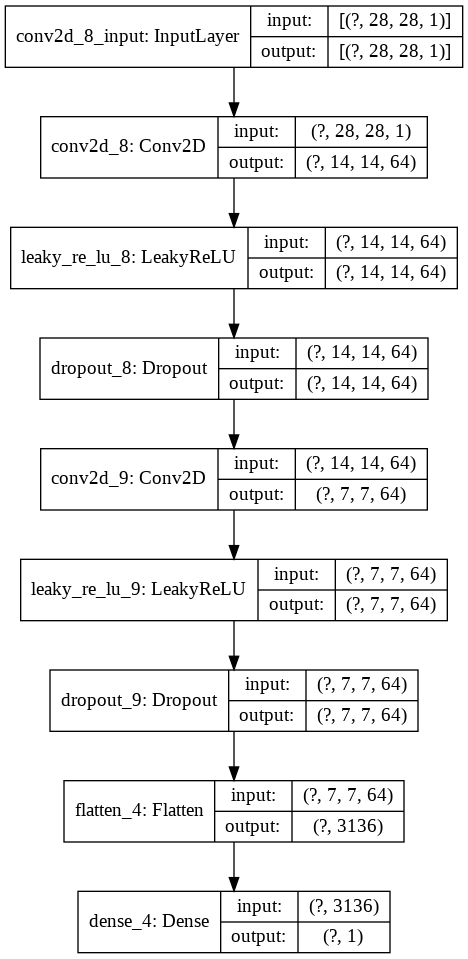

In [ ]:
model = discriminator_model()

model.summary()

plot_model(model, show_shapes=True)

In [ ]:
def real_sampling(dataset, n_samples):

  rand_num = randint(0, dataset.shape[0], n_samples)
  X = dataset[rand_num]
  y = ones((n_samples,1))

  return X, y

def fake_sampling(n_samples):

  X = rand(28 * 28 * n_samples)
  X = X.reshape((n_samples, 28, 28, 1))
  y = zeros((n_samples, 1))

  return X, y

def train_discriminator(model, dataset, n_iter=100, n_batch=256, print_performance=False):
  
  half_batch = int(n_batch / 2)

  for i in range(n_iter):
    X_real, y_real = real_sampling(dataset, half_batch)
    _, real_acc = model.train_on_batch(X_real, y_real)

    X_fake, y_fake = fake_sampling(half_batch)
    _, fake_acc = model.train_on_batch(X_fake, y_fake)

    if print_performance:
      print(">>> {}: real={}, fake={}".format(i+1, real_acc, fake_acc))


def reset(trainX):

  X = expand_dims(trainX, axis=-1)

  X = X.astype("float32")

  X = X / 255.0

  model = discriminator_model()

  return model, X

In [ ]:
(trainX, trainy), (testX, testy) = load_data()

X = expand_dims(trainX, axis=-1)

X = X.astype("float32")

X = X / 255.0

train_discriminator(model, X, print_performance=True)

>>> 1: real=0.2578125, fake=0.46875
>>> 2: real=0.515625, fake=0.6328125
>>> 3: real=0.453125, fake=0.7421875
>>> 4: real=0.5078125, fake=0.8671875
>>> 5: real=0.5625, fake=0.9921875
>>> 6: real=0.5390625, fake=0.9921875
>>> 7: real=0.6015625, fake=1.0
>>> 8: real=0.59375, fake=1.0
>>> 9: real=0.625, fake=1.0
>>> 10: real=0.65625, fake=1.0
>>> 11: real=0.5234375, fake=1.0
>>> 12: real=0.5859375, fake=1.0
>>> 13: real=0.6796875, fake=1.0
>>> 14: real=0.671875, fake=1.0
>>> 15: real=0.6875, fake=1.0
>>> 16: real=0.6796875, fake=1.0
>>> 17: real=0.6875, fake=1.0
>>> 18: real=0.78125, fake=1.0
>>> 19: real=0.796875, fake=1.0
>>> 20: real=0.78125, fake=1.0
>>> 21: real=0.859375, fake=1.0
>>> 22: real=0.8046875, fake=1.0
>>> 23: real=0.8984375, fake=1.0
>>> 24: real=0.9140625, fake=1.0
>>> 25: real=0.9140625, fake=1.0
>>> 26: real=0.8984375, fake=1.0
>>> 27: real=0.9296875, fake=1.0
>>> 28: real=0.9453125, fake=1.0
>>> 29: real=0.9375, fake=1.0
>>> 30: real=0.96875, fake=1.0
>>> 31: real=0.9